In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn

In [2]:
df = pd.read_csv('IRIS.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [9]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [5]:
df.drop('Id', axis=1, inplace=True)

In [7]:
df.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

# Steps for PCA

* Find the covariance matrix of the feature vector
* Find the eigen values and eigen vectors for the covariance matrix
* Sort the eigen values in ascending manner and take the top 2 values
* Project the feature matrix to the new principal components matrix

In [10]:
X = df.drop('Species', axis=1)
y = df.Species

In [47]:
# Mean centering
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

### Step 1 - Covariance Matrix

In [48]:
cov_x = np.cov(X_centered, rowvar=False)
print(cov_x)

[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


### Step 2 - Find Eigen Values & Eigen Vectors and Sort them in ascending order

* Make sure the correspondence between the values and vectors retains same after sorting
* Hint - use `argsort()`

In [49]:
eigens = np.linalg.eigh(cov_x)

In [50]:
eigen_vals = eigens[0]
eigen_vecs = eigens[1]
# Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigen_vals)[::-1]
eigenvalues_sorted = eigen_vals[sorted_indices]
eigenvectors_sorted = eigen_vecs[:, sorted_indices]


In [51]:
# Select the top 2 eigenvectors
k = 2
eigenvectors_subset = eigenvectors_sorted[:, :k]


In [56]:
X_reduced = X @ eigenvectors_subset
X_reduced

,0,1
0,-2.827136,5.641331
1,-2.795952,5.145167
2,-2.621524,5.177378
3,-2.764906,5.003599
4,-2.782750,5.648648
...,...,...
145,-7.455360,5.502139
146,-7.037007,4.939703
147,-7.275389,5.393243
148,-7.412972,5.430600


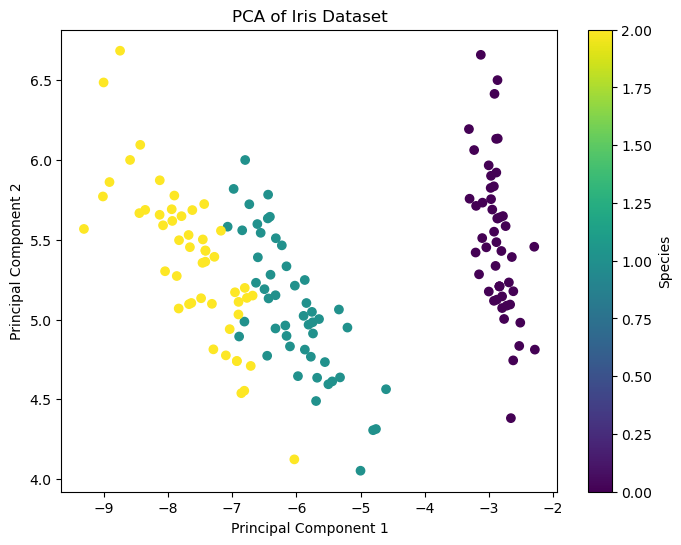

In [58]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_reduced[0], X_reduced[1], c=y, cmap='viridis')
plt.colorbar(scatter, label='Species')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.show()


## THE DATA IS NOT SORTED PROPERLY